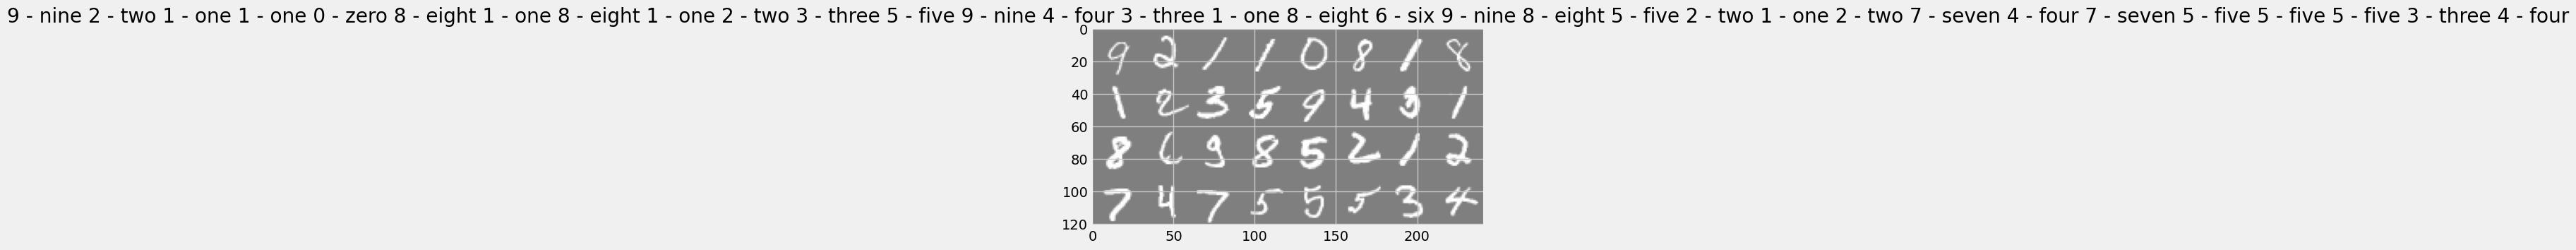

In [100]:
import torch, torchvision
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)
'''
for item1, item2 in loader:   item1 = pixel values, item2 = labels
  print(item1)
  print(item2)
  break

print(type(dataset))
print(type(dataset[0]))
'''
images, labels = next(iter(loader))
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0) / 2 + 0.5);
plt.title(' '.join(dataset.classes[label] for label in labels)); plt.show()

In [ ]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Epoch 1/20, Loss: 0.045204
Epoch 2/20, Loss: 0.031392
Epoch 3/20, Loss: 0.028443
Epoch 4/20, Loss: 0.029517
Epoch 5/20, Loss: 0.031395
Epoch 6/20, Loss: 0.029908
Epoch 7/20, Loss: 0.029166
Epoch 8/20, Loss: 0.023029
Epoch 9/20, Loss: 0.025030
Epoch 10/20, Loss: 0.026540
Epoch 11/20, Loss: 0.015735
Epoch 12/20, Loss: 0.026200
Epoch 13/20, Loss: 0.022918
Epoch 14/20, Loss: 0.022602
Epoch 15/20, Loss: 0.019827
Epoch 16/20, Loss: 0.021344
Epoch 17/20, Loss: 0.022918
Epoch 18/20, Loss: 0.016063
Epoch 19/20, Loss: 0.019728
Epoch 20/20, Loss: 0.018981


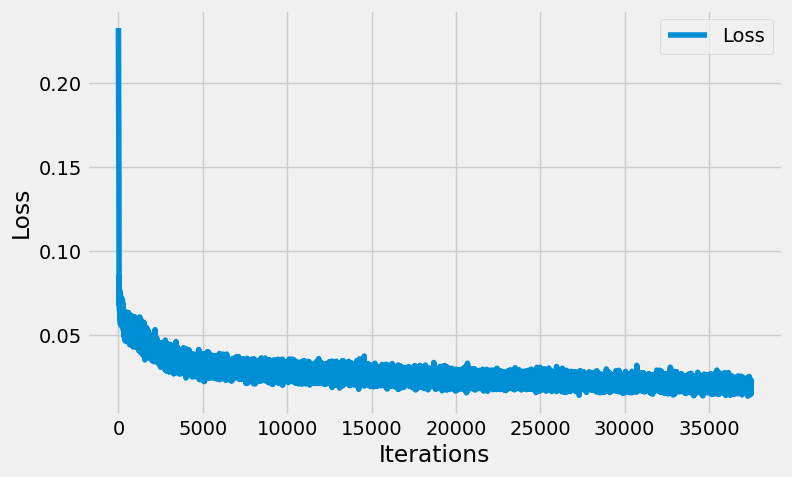

In [ ]:
model = AE()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    for images, _ in loader:
        images = images.view(-1, 28 * 28).to(device)

        reconstructed = model(images)
        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

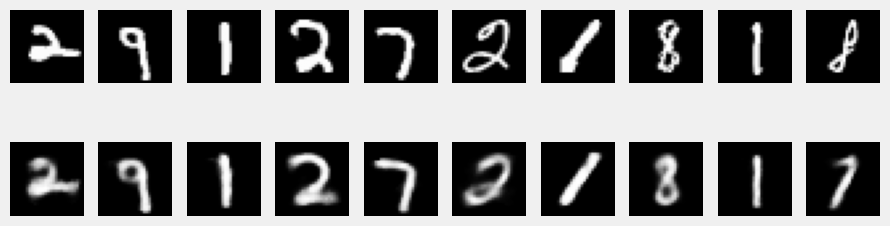

In [ ]:
model.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.view(-1, 28 * 28).to(device)
reconstructed = model(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()

In [220]:
import torch, random
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

tensor_transform = transforms.ToTensor()
#dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
#loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

x_trn = [float(random.randint(-100, 100)) for _ in range(6000)]
y_trn = [5*x_trn[i]+3.6+random.randint(-500, 500)/50 for i in range(len(x_trn))]
data_trn = torch.tensor([(x_trn[i], y_trn[i]) for i in range(len(x_trn))], dtype=torch.float32)
print(data_trn[:,:])
print(data_trn[:,:1])
print(data_trn[:,1:])
empty = [float(0) for _ in range(len(x_trn))]

#dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=data_trn, batch_size=32, shuffle=True)

tensor([[ -97.0000, -477.2600],
        [  53.0000,  261.4200],
        [ -47.0000, -226.0000],
        ...,
        [  27.0000,  128.6600],
        [  17.0000,   96.4600],
        [  56.0000,  288.3800]])
tensor([[-97.],
        [ 53.],
        [-47.],
        ...,
        [ 27.],
        [ 17.],
        [ 56.]])
tensor([[-477.2600],
        [ 261.4200],
        [-226.0000],
        ...,
        [ 128.6600],
        [  96.4600],
        [ 288.3800]])


In [221]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            #nn.Linear(64, 36),
            #nn.ReLU(),
            #nn.Linear(36, 18),
            #nn.ReLU(),
            nn.Linear(16, 4)
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            #nn.Linear(36, 64),
            #nn.ReLU(),
            #nn.Linear(64, 16),
            #nn.ReLU(),
            nn.Linear(8, 2),
            #nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [222]:
model = AE()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  #, weight_decay=1e-8)

tensor([[  46.0000,  235.4800],
        [  -5.0000,  -28.0400],
        [  32.0000,  158.6800],
        [  48.0000,  244.3800],
        [ -94.0000, -458.5000],
        [  30.0000,  161.2000],
        [  54.0000,  274.0400],
        [  25.0000,  124.0800],
        [  94.0000,  483.5200],
        [ -68.0000, -345.8400],
        [ -89.0000, -443.2800],
        [ -80.0000, -401.7200],
        [ -50.0000, -241.6600],
        [  17.0000,   95.5600],
        [  20.0000,  108.2400],
        [ -50.0000, -252.2800],
        [  86.0000,  424.6400],
        [ -27.0000, -132.5800],
        [  46.0000,  241.5600],
        [ -14.0000,  -60.1000],
        [ -82.0000, -414.3800],
        [  39.0000,  193.3400],
        [ -95.0000, -472.6600],
        [ -91.0000, -444.8200],
        [  87.0000,  437.3600],
        [ -60.0000, -300.5600],
        [  59.0000,  301.1000],
        [   9.0000,   53.6800],
        [   5.0000,   19.3200],
        [ -69.0000, -335.0800],
        [  51.0000,  254.5800],
        

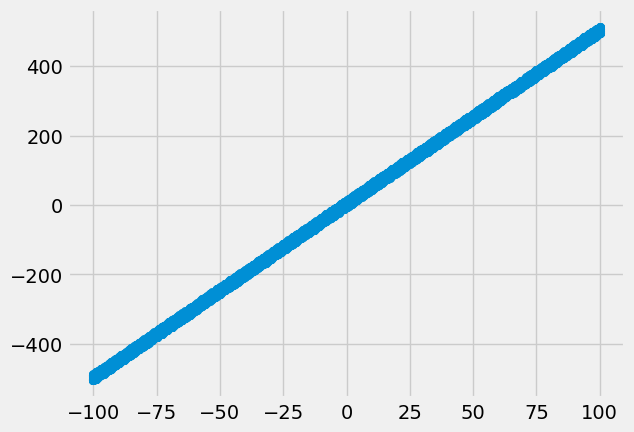

In [226]:
for x in loader:
  print(x)
  #print(x.view(-1, 1))
  #print(y.view(-1, 1))
  break

plt.scatter(x_trn, y_trn)
plt.show()

Epoch 1/10, Loss: 1.270381
Epoch 2/10, Loss: 0.700231
Epoch 3/10, Loss: 0.877249
Epoch 4/10, Loss: 1.406420
Epoch 5/10, Loss: 0.933281
Epoch 6/10, Loss: 53.425369
Epoch 7/10, Loss: 0.911517
Epoch 8/10, Loss: 2.338907
Epoch 9/10, Loss: 0.731513
Epoch 10/10, Loss: 0.999466


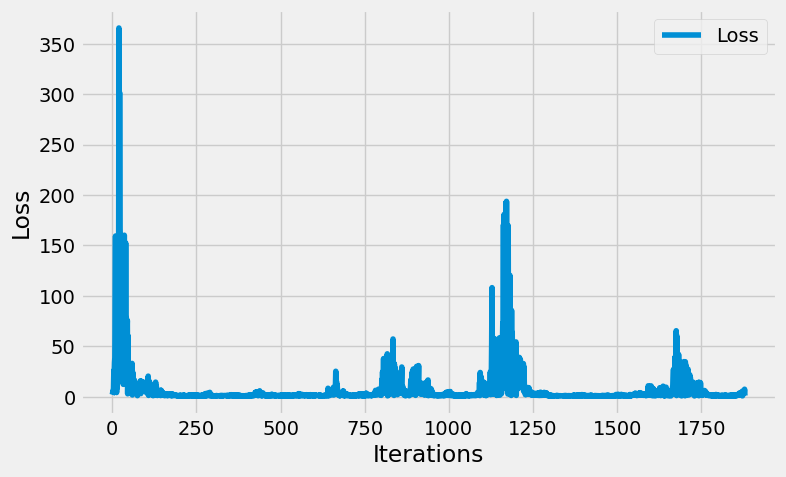

In [235]:
epochs = 10
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
  for images in loader:
    #images = images.view(-1, 2)#.to(device)
    model.train()

    reconstructed = model(images)#.to(torch.float32)
    loss = loss_function(reconstructed, images)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    outputs.append((epoch, images, reconstructed))
  print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

tensor([[-101.0756, -476.2756],
        [  51.6629,  259.1476],
        [ -48.3252, -225.6626],
        ...,
        [  25.1372,  127.7116],
        [  18.6100,   95.4697],
        [  56.9911,  285.6146]], grad_fn=<AddmmBackward0>)


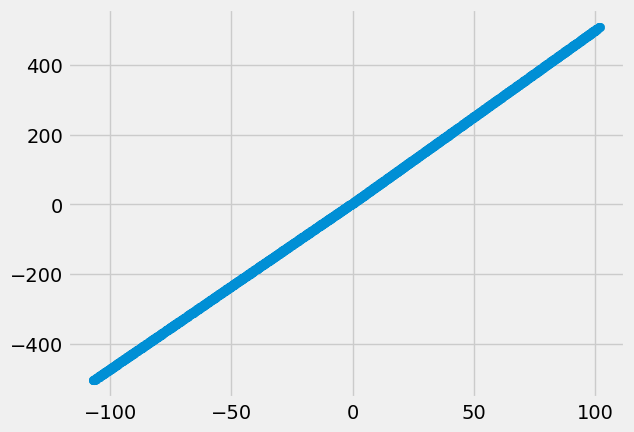

"\nfig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))\nfor i in range(10):\n    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(1, 1), cmap='gray')\n    axes[0, i].axis('off')\n    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(1, 1), cmap='gray')\n    axes[1, i].axis('off')\nplt.show()\n"

In [236]:
model.eval()
#dataiter = iter(loader)
#images = next(dataiter)

#images = images.view(-1, 2).to(device)
reconstructed = model(data_trn)
print(reconstructed)

plt.scatter(reconstructed[:,:1].detach().numpy(),reconstructed[:,1:].detach().numpy())
plt.show()
'''
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(1, 1), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(1, 1), cmap='gray')
    axes[1, i].axis('off')
plt.show()
'''

In [150]:
import torch

# Create a 2D tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Slice rows 1 to 2 (exclusive) and columns 0 to 2 (exclusive)
sliced_tensor = tensor[:, 1:2]
print(sliced_tensor)
# Output:
# tensor([[4, 5],
# [7, 8]])

tensor([[2],
        [5],
        [8]])
